In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.stats import lognorm
import richardsplot

In [2]:
df = pd.read_csv("SpringFinalFigs_moreParams.csv")

pf = 1e-3*(df[["peak_flux"]].values.flatten()) #values in µJy - want mJy

In [3]:
pixels = 1000.*(pd.read_csv("forced_photometry.csv").values.flatten()) #values in Jy - want mJy

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


Fit Results:
Mean = 0.1389 mJy/b
Std  = 0.5734 mJy/b


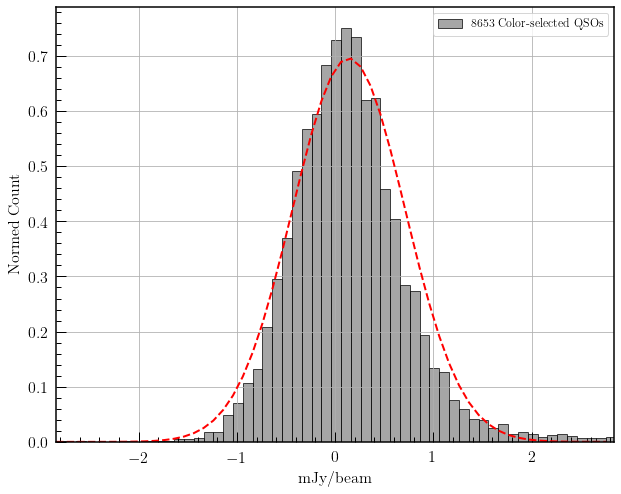

In [27]:
pixbins=np.arange(min(pixels), max(pixels), .1)

fig = plt.figure(figsize=(10,8))
plt.hist(pixels, color="grey", edgecolor="k", density=True, bins=pixbins, alpha=0.7, label="8653 Color-selected QSOs")
plt.xlim(min(pixels), abs(min(pixels)))
plt.xlabel("mJy/beam")
plt.ylabel("Normed Count")
plt.legend(loc="best")
plt.grid(True)

# best fit of data
(mu, sigma) = norm.fit(pixels[pixels<abs(min(pixels))])

# add a 'best fit' line
y = mlab.normpdf(pixbins[pixbins<=abs(min(pixels))], mu, sigma)
l = plt.plot(pixbins[pixbins<=abs(min(pixels))], y, 'r--', linewidth=2)

print("Fit Results:")
print("Mean = %.4f mJy/b" % (mu))
print("Std  = %.4f mJy/b" % (sigma))

Note: This distribution actually has a very long tail extending to ~3.2 Jy/b and the fit shown was only performed on the selected window

---

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


Fit Results:
Mean = 0.0742 mJy/b
Std  = 0.0956 mJy/b


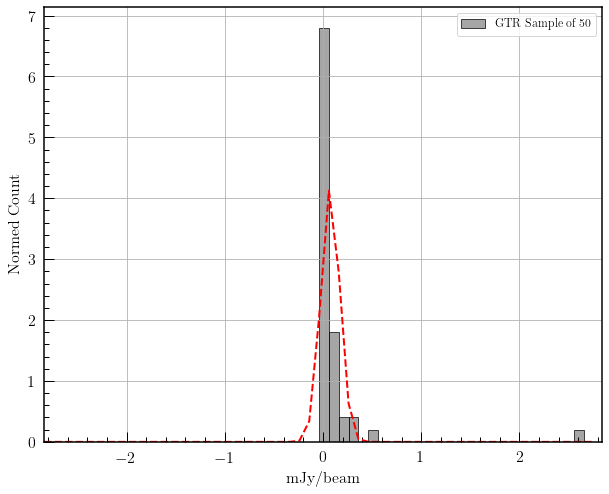

In [5]:
fig = plt.figure(figsize=(10,8))
plt.hist(pf, color="grey", edgecolor="k", density=True, bins=pixbins, alpha=0.7, label="GTR Sample of 50")
plt.xlim(min(pixels), abs(min(pixels)))
plt.xlabel("mJy/beam")
plt.ylabel("Normed Count")
plt.legend(loc="best")
plt.grid(True)

# best fit of data
(mu, sigma) = norm.fit(pf[pf<2.])

# add a 'best fit' line
y = mlab.normpdf(pixbins[pixbins<=abs(min(pixels))], mu, sigma)
l = plt.plot(pixbins[pixbins<=abs(min(pixels))], y, 'r--', linewidth=2)

print("Fit Results:")
print("Mean = %.4f mJy/b" % (mu))
print("Std  = %.4f mJy/b" % (sigma))

In [15]:
1e3*np.median(pixels[pixels<abs(min(pixels))])

110.0

In [8]:
.1389/93

0.001493548387096774